In [1]:
print(1)

1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from analyze_src.basic_data_inspection import DataInspector, DataTypesInspectionStrategy, SummaryStatisticsInspectionStrategy
from analyze_src.missing_values_analysis import SimpleMissingValuesAnalysis
from analyze_src.univariate_analysis import UnivariateAnalyzer, NumericalUnivariateAnalysis, CategoricalUnivariateAnalysis
from analyze_src.bivariate_analysis import BivariateAnalyzer, NumericalVsNumericalAnalysis, CategoricalVsNumericalAnalysis
from analyze_src.multivariate_analysis import SimpleMultivariateAnalysis

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [4]:
data_path = r"C:\Users\venka\PycharmProjects\Churn_analysis\Data\customer_churn_data.csv"
df = pd.read_csv(data_path)

In [5]:
data_inspector = DataInspector(DataTypesInspectionStrategy())
data_inspector.execute_inspection(df)


Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB
None


In [6]:
data_inspector.set_strategy(SummaryStatisticsInspectionStrategy())
data_inspector.execute_inspection(df)


Summary Statistics (Numerical Features):
        CustomerID          Age      Tenure  MonthlyCharges  TotalCharges
count  1000.000000  1000.000000  1000.00000     1000.000000   1000.000000
mean    500.500000    44.674000    18.97300       74.391290   1404.364060
std     288.819436     9.797741    18.89257       25.712083   1571.755048
min       1.000000    12.000000     0.00000       30.000000      0.000000
25%     250.750000    38.000000     5.00000       52.357500    345.217500
50%     500.500000    45.000000    13.00000       74.060000    872.870000
75%     750.250000    51.000000    26.00000       96.102500   1900.175000
max    1000.000000    83.000000   122.00000      119.960000  12416.250000

Summary Statistics (Categorical Features):
        Gender    ContractType InternetService TechSupport Churn
count     1000            1000             703        1000  1000
unique       2               3               2           2     2
top     Female  Month-to-Month     Fiber Optic       

### Data Imbalance and Categorical Feature Encoding

#### Class Distribution:

- In the dataset, 88.3% of the records are labeled as `Churn`, and the remaining 11.7% as `Not Churn`.
- This shows a significant class imbalance, which may lead to a biased model favoring the majority class.

To address this, I will consider:
- Oversampling the minority class (e.g., using SMOTE)
- Undersampling the majority class
- Using class weights during model training

---

#### Categorical Features:

- There are 5 categorical (non-numeric) features in the dataset.
- Since most machine learning models work with numerical inputs, these features need to be encoded.

I will use:
- Label Encoding for ordinal features (if any)
- One-Hot Encoding for nominal features

This step ensures that the model can effectively process all the features.



Missing Values Count by Column:
InternetService    297
dtype: int64

Visualizing Missing Values...


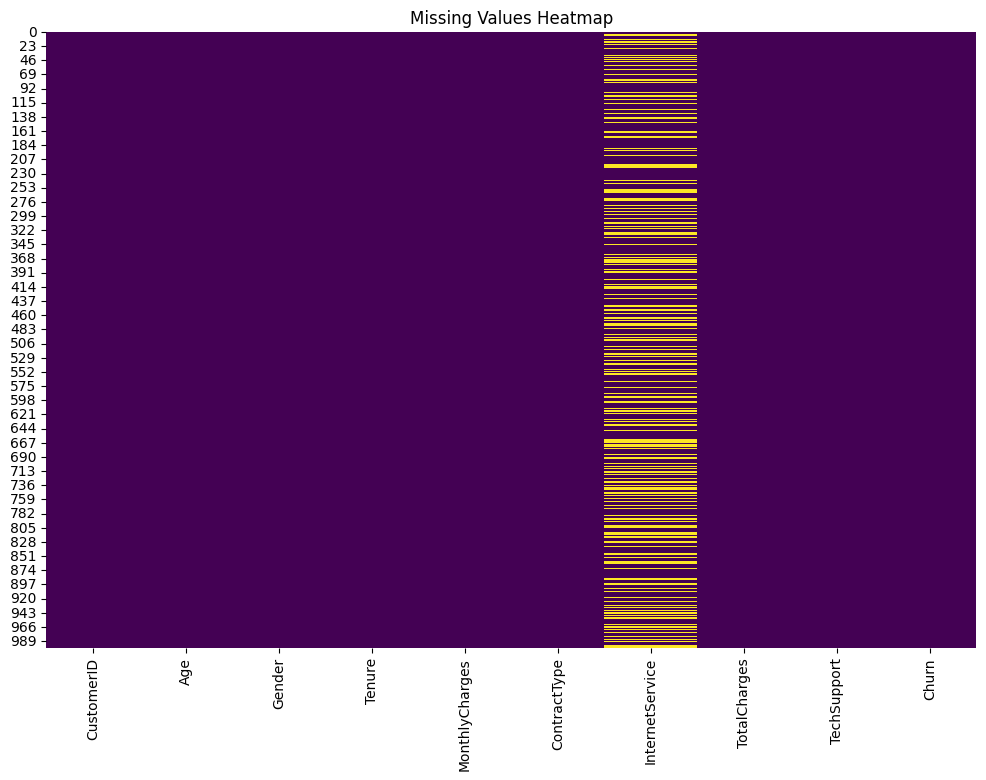

In [7]:
missing_values_analyzer = SimpleMissingValuesAnalysis()
missing_values_analyzer.analyze(df)


 ### Missing Values Analysis

After analyzing the dataset for missing values, it was observed that only the `InternetService` feature contains missing values.

- These missing values do not follow any specific pattern.
- Therefore, they appear to be **randomly distributed** (Missing Completely at Random - MCAR).

I will handle these missing values appropriately (e.g., by imputation or removal) depending on their count and impact on the analysis.


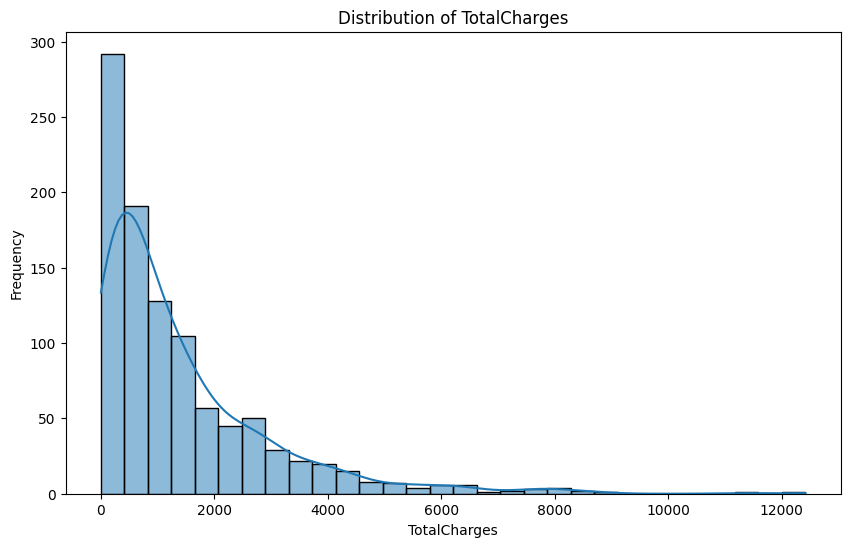

In [8]:
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, 'TotalCharges')

### Distribution of TotalCharges

The distribution of the **TotalCharges** variable is right-skewed, as observed from the histogram and KDE plot.

- Most of the values are concentrated between 0 and 2000, with fewer customers having higher total charges.
- The distribution has a long tail on the right, indicating a small number of customers with very high charges.
- This shows the data is not normally distributed and may affect algorithms that assume normality.

#### Possible Next Steps:
- Apply a log transformation (e.g., `np.log1p`) to reduce skewness and normalize the distribution.
- Use robust scaling methods (like `RobustScaler`) instead of standard scaling due to the presence of outliers.
- Consider binning total charges for better interpretability in some models or visualizations.


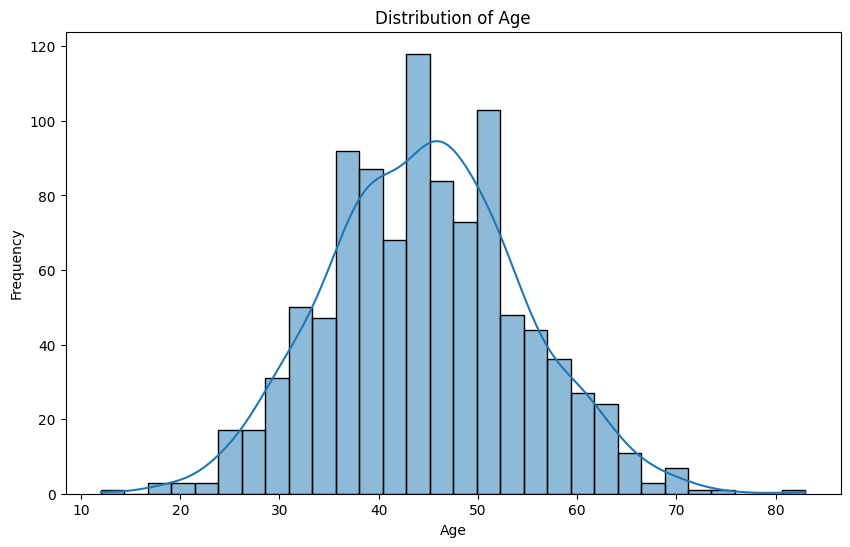

In [12]:
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, 'Age')

### Distribution of Age

The distribution of the **Age** variable appears to be roughly **bell-shaped**, indicating an approximately **normal distribution**, though slightly skewed to the right.

- Most of the values are concentrated between **30 and 60 years**.
- The peak occurs around the **40–45 age range**, showing that a majority of customers are in this group.
- There are fewer younger and older individuals, creating slight asymmetry on both ends.

#### Insights and Actions:
- Since the distribution is close to normal, **standard scaling** (e.g., `StandardScaler`) is suitable for this feature.
- No transformation is needed unless a model requires strict normality or residual analysis suggests non-linearity.
- This feature is likely informative for modeling customer behavior patterns, especially when combined with tenure or charges.


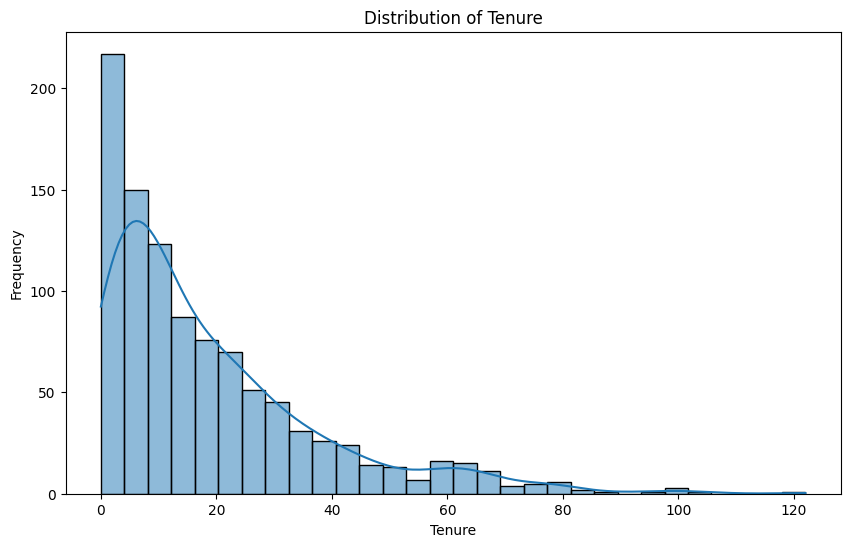

In [13]:
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, 'Tenure')

### Distribution of Tenure

The distribution of the **Tenure** variable is **right-skewed**, with most values concentrated at the lower end.

- A large number of customers have a tenure of less than **20 months**, with the highest frequency near 0–10 months.
- Very few customers have stayed beyond **60 months**, creating a long tail toward the right.
- This suggests that many customers are relatively new or leave early, which could be relevant for churn prediction.

#### Insights and Actions:
- Because of the strong skewness, **log transformation** or **power transformation** can help normalize the distribution.



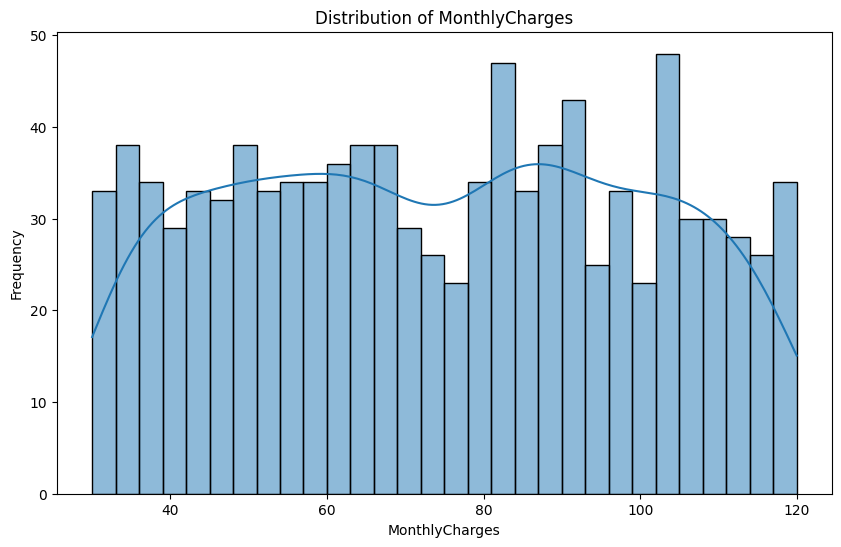

In [14]:
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, 'MonthlyCharges')

### Distribution of MonthlyCharges

The distribution of the **MonthlyCharges** variable appears to be **fairly uniform** across the entire range.

- Customers are almost evenly distributed from around **$20 to $120** in monthly charges.
- There is no clear peak or dominant range in the distribution.
- The KDE curve also supports the absence of strong skewness or modality.

#### Insights and Actions:
- Since the data is already well-distributed, **no transformation** is needed.
- **StandardScaler or MinMaxScaler** can be safely used if required for modeling.
- This feature may be highly useful in understanding customer segmentation and spending behavior.


c:\Users\venka\PycharmProjects\Churn_analysis\analysis\analyze_src\univariate_analysis.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


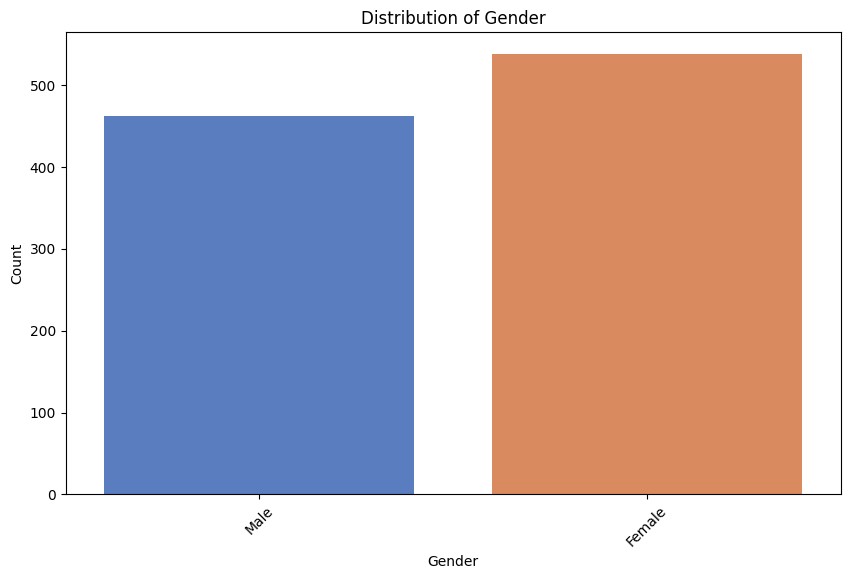

In [16]:
univariate_analyzer = UnivariateAnalyzer(CategoricalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, 'Gender')

### Distribution of Gender

The bar plot shows the distribution of the **Gender** variable.

- The number of **female customers is slightly higher** than the number of male customers.
- However, the distribution is relatively **balanced**, with no significant skew toward either gender.
- This balance is helpful for building fair and unbiased machine learning models, as **gender does not dominate the dataset**.

No special preprocessing is needed here other than encoding (e.g., using Label Encoding or One-Hot Encoding) to convert the categorical variable into numerical format for modeling.


c:\Users\venka\PycharmProjects\Churn_analysis\analysis\analyze_src\univariate_analysis.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


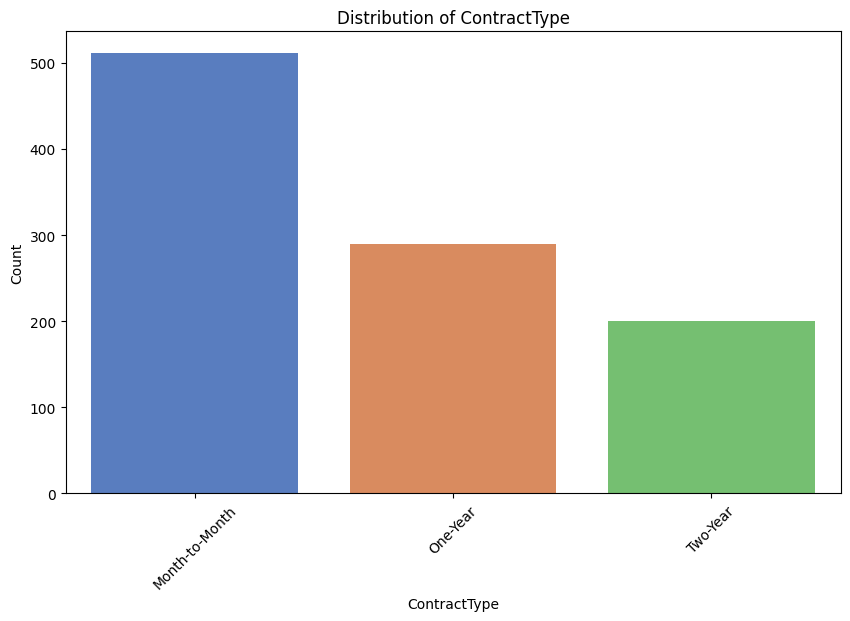

In [18]:
univariate_analyzer = UnivariateAnalyzer(CategoricalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, 'ContractType')

### Distribution of ContractType

The bar plot shows the distribution of customer contract types:

- The majority of customers have **Month-to-Month** contracts.
- A smaller portion have **One-Year** contracts.
- The smallest group has **Two-Year** contracts.

#### Insights:
- Customers with Month-to-Month contracts are generally more flexible and may be more likely to churn.
- Long-term contract holders (One-Year and Two-Year) might show higher loyalty or satisfaction.
- This feature can be a strong predictor in churn modeling and may benefit from **target encoding** or **one-hot encoding** before being used in a model.


c:\Users\venka\PycharmProjects\Churn_analysis\analysis\analyze_src\univariate_analysis.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


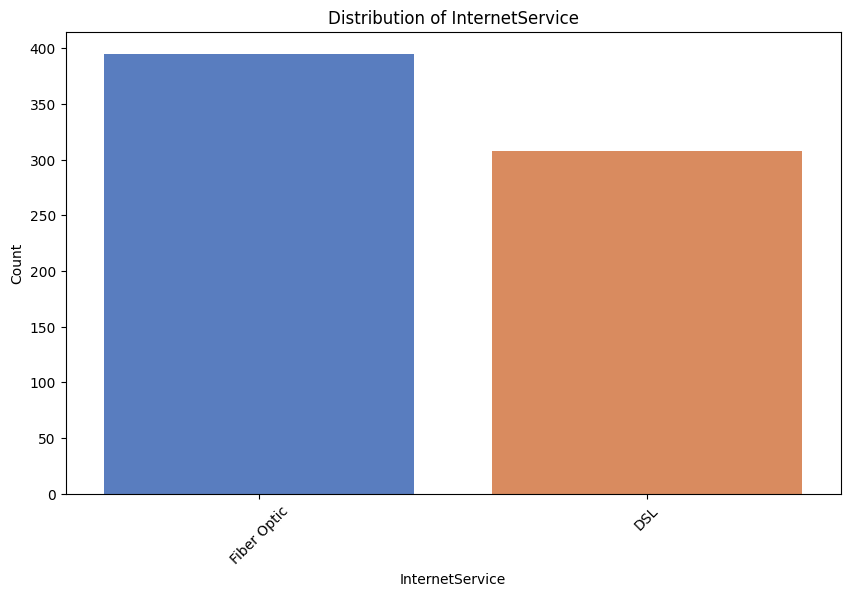

In [19]:
univariate_analyzer = UnivariateAnalyzer(CategoricalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, 'InternetService')

### Distribution of InternetService

The bar plot shows the types of internet services used by customers:

- Most customers use **Fiber Optic**.
- A smaller group uses **DSL**.
- Other types like "No InternetService" may not be shown in this plot.

#### Key Points:
- Fiber Optic is the most common, but might also be linked to higher churn due to cost.
- This feature is useful for predicting customer behavior.
- It will be encoded before being used in the model.


c:\Users\venka\PycharmProjects\Churn_analysis\analysis\analyze_src\univariate_analysis.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


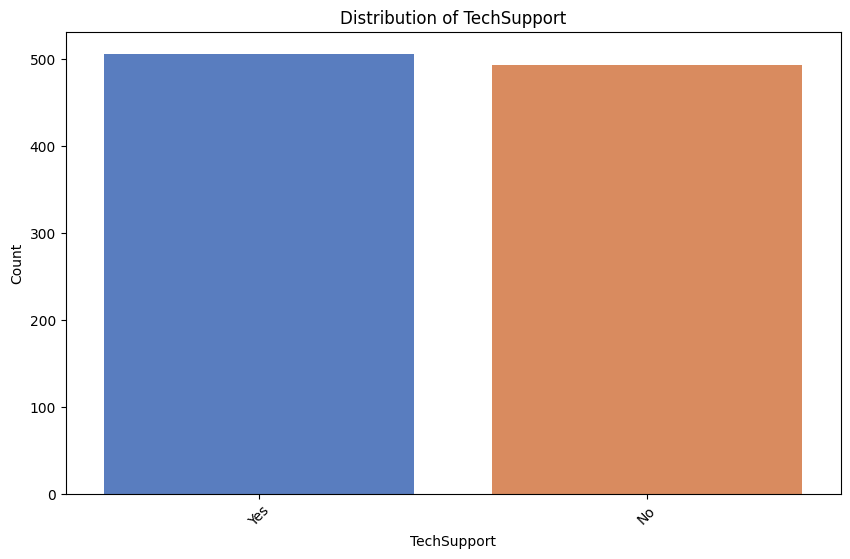

In [20]:
univariate_analyzer = UnivariateAnalyzer(CategoricalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, 'TechSupport')

### Simple Preprocessing Steps

- **CustomerID**: Drop it.
- **Age**: Use as-is or scale.
- **Gender**: Encode it.
- **Tenure**: Log transform or bin.
- **MonthlyCharges**: Use as-is or scale.
- **ContractType**: Encode it.
- **InternetService**: Fill missing, then encode.
- **TotalCharges**: Log transform.
- **TechSupport**: Just encode.
- **Churn**: Convert to 0 and 1.
